In [ ]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from mpl_toolkits.mplot3d import Axes3D
from math import pi, ceil
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances
import random

In [ ]:
!nvidia-smi

# 1. Clustering

In [ ]:
df_dataset = pd.read_csv('/content/drive/MyDrive/data/MusicRecommendation/dataset.csv')
df_dataset.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113992 entries, 0 to 113991
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113992 non-null  int64  
 1   track_id          113992 non-null  object 
 2   artists           113991 non-null  object 
 3   album_name        113991 non-null  object 
 4   track_name        113991 non-null  object 
 5   popularity        113992 non-null  int64  
 6   duration_ms       113992 non-null  int64  
 7   explicit          113992 non-null  bool   
 8   danceability      113992 non-null  float64
 9   energy            113992 non-null  float64
 10  key               113992 non-null  int64  
 11  loudness          113992 non-null  float64
 12  mode              113992 non-null  int64  
 13  speechiness       113992 non-null  float64
 14  acousticness      113992 non-null  float64
 15  instrumentalness  113992 non-null  float64
 16  liveness          11

In [ ]:
df_dataset.nunique()

Unnamed: 0          113992
track_id             89733
artists              31431
album_name           46573
track_name           73595
popularity             101
duration_ms          50693
explicit                 2
danceability          1174
energy                2083
key                     12
loudness             19480
mode                     2
speechiness           1489
acousticness          5061
instrumentalness      5346
liveness              1722
valence               1790
tempo                45650
time_signature           5
track_genre            114
dtype: int64

In [ ]:
df_dataset[df_dataset['track_name']=='FAKE LOVE']

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65015,65018,6m1TWFMeon7ai9XLOzdbiR,BTS,Love Yourself 轉 'Tear',FAKE LOVE,76,242333,False,0.557,0.719,...,-4.515,0,0.0371,0.00267,0.0,0.306,0.345,77.502,4,k-pop
65565,65568,6a0gRYXKK0YU69cXaB2RrK,BTS,Love Yourself 結 'Answer',FAKE LOVE,61,242333,False,0.557,0.719,...,-4.515,0,0.0371,0.00267,0.0,0.306,0.345,77.502,4,k-pop
65687,65690,3YspylwDrs1LuzPONbKmAL,BTS,Proof,FAKE LOVE,63,242333,False,0.522,0.714,...,-4.727,0,0.0461,0.00257,0.0,0.304,0.357,154.904,4,k-pop
81981,81987,6m1TWFMeon7ai9XLOzdbiR,BTS,Love Yourself 轉 'Tear',FAKE LOVE,76,242333,False,0.557,0.719,...,-4.515,0,0.0371,0.00267,0.0,0.306,0.345,77.502,4,pop


In [ ]:
df_dataset.drop(df_dataset.columns[19], axis=1, inplace=True)
df_dataset.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,acoustic


Drop duplicated songs

In [ ]:
key_columns = ["artists", "album_name", "track_name"]
old_df = df_dataset.copy()
df_dataset.drop_duplicates(subset=key_columns, inplace=True)
df_dataset.reset_index(drop=True, inplace=True)
df_dataset

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89365,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,world-music
89366,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,world-music
89367,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,world-music
89368,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,world-music


In [ ]:
# Merge to find the common rows
merged_df = pd.merge(old_df, df_dataset, how='inner')

dropped_df = old_df.drop_duplicates().merge(merged_df, how='left', indicator=True).query("_merge == 'left_only'").drop('_merge', axis=1)

dropped_df

Save dropped songs indexes

In [ ]:
dropped_indexes = dropped_df.index
dropped_indexes

In [ ]:
df_dataset.drop([df_dataset.columns[0]], axis=1, inplace=True)
df_dataset.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,acoustic


In [ ]:
df_dataset['duration_ms'] = df_dataset['duration_ms']/1000
df_dataset.rename(columns={'duration_ms': 'duration_s'}, inplace=True)
df_dataset

,track_id,artists,album_name,track_name,popularity,duration_s,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230.666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149.610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210.826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201.933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198.853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89365,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384.999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,world-music
89366,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385.000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,world-music
89367,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271.466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,world-music
89368,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283.893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,world-music


In [ ]:
ax = sns.heatmap(df_dataset.corr(), annot=True)
plt.show()

We choose 9 audio features to work with

In [ ]:
columns_to_cluster = ['acousticness', 'danceability', 'energy', 'instrumentalness',
                         'liveness','valence', 'tempo','speechiness', 'loudness']

Normalization N(0, 1)

In [ ]:
ss = StandardScaler()

songs_scaled = ss.fit_transform(df_dataset[columns_to_cluster])
print(songs_scaled[0,:])

[-0.87585023  0.64432137 -0.67542626 -0.53576285  0.72261051  0.93350009
 -1.13350224  0.48994064  0.33612416]


In [ ]:
columns_to_cluster_scaled = ['acousticness_scaled', 'danceability_scaled',
                             'energy_scaled', 'instrumentalness_scaled', 'liveness_scaled'
                             , 'valence_scaled', 'tempo_scaled','speechiness_scaled', 'loudness_scaled']

df_scaled = pd.DataFrame(songs_scaled, columns=columns_to_cluster_scaled)

In [ ]:
ax = sns.heatmap(df_scaled.corr(), annot=True)
plt.show()

100 Clusters

In [ ]:
k = 100
model = KMeans(n_clusters=k, random_state=42).fit(songs_scaled)
pred = model.predict(songs_scaled)
print('10 first clusters: ', model.labels_[:10])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


10 first clusters:  [24 12 56 36  8 70 74 44 57 56]


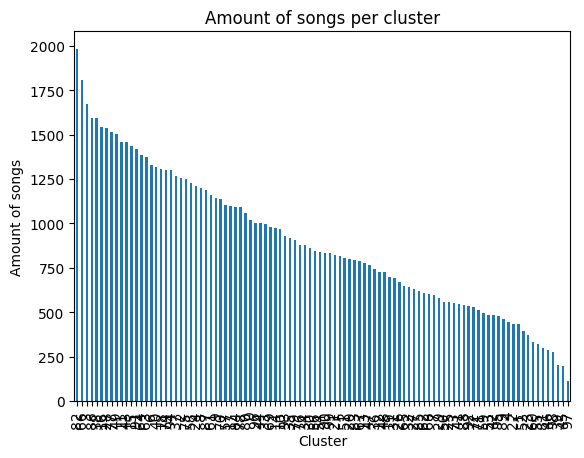

In [ ]:
df_scaled['cluster'] = model.labels_

df_scaled['cluster'].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Amount of songs')
plt.title('Amount of songs per cluster')
plt.show()

In [ ]:
display(df_scaled['cluster'].value_counts())
minor_cluster = df_scaled['cluster'].value_counts().tail(1)
print("Amount of songs in the smallest cluster: ", int(minor_cluster.values))

82    1982
66    1806
3     1674
86    1595
38    1594
      ... 
46     286
98     274
39     205
45     198
97     111
Name: cluster, Length: 100, dtype: int64

Amount of songs in the smallest cluster:  111


In [ ]:
df_scaled

,acousticness_scaled,danceability_scaled,energy_scaled,instrumentalness_scaled,liveness_scaled,valence_scaled,tempo_scaled,speechiness_scaled,loudness_scaled,cluster
0,-0.875850,0.644321,-0.675426,-0.535763,0.722611,0.933500,-1.133502,0.489941,0.336124,24
1,1.759089,-0.804534,-1.824731,-0.535749,-0.595244,-0.770417,-1.479776,-0.098337,-1.671039,12
2,-0.350517,-0.702661,-1.072813,-0.535766,-0.513198,-1.329515,-1.518195,-0.280024,-0.235656,56
3,1.702951,-1.676110,-2.239260,-0.535548,-0.436281,-1.242037,1.981994,-0.451127,-1.915978,36
4,0.414732,0.316065,-0.745553,-0.535766,-0.688058,-1.150755,-0.069844,-0.307365,-0.225514,8
...,...,...,...,...,...,...,...,...,...,...
89365,0.919974,-2.208112,-1.555911,2.328657,-0.670623,-1.656986,0.130920,-0.399090,-1.509915,19
89366,1.965913,-2.196793,-2.015633,2.476816,-0.574732,-1.652802,-1.222428,-0.417612,-1.878281,83
89367,1.590675,0.378321,-1.189692,-0.535766,-0.682930,1.039995,0.342874,-0.400854,-0.457824,79
89368,0.154725,0.140618,-0.500109,-0.535766,0.271361,-0.215122,0.461819,-0.509337,-0.456676,8


# 2. Neural net 1 (for spotify recommendation dataset)

In [ ]:
df_output = pd.read_csv("/content/drive/MyDrive/data/MusicRecommendation/output.csv")
df_output.head()

In [ ]:
df_output.info()

Drop songs corresponding to original dataset

In [ ]:
for i in dropped_indexes:
  df_output.drop(range(5*i, 5*i+5), inplace = True)
df_output.reset_index(drop=True, inplace=True)

In [ ]:
df_output.info()

In [ ]:
df_output.to_csv('/content/drive/MyDrive/data/MusicRecommendation/output_drop.csv', index=False)

In [ ]:
df_output = pd.read_csv("/content/drive/MyDrive/data/MusicRecommendation/output_drop.csv")
df_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446850 entries, 0 to 446849
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   No.               446850 non-null  object 
 1   track_id          446850 non-null  object 
 2   artists           446525 non-null  object 
 3   album_name        446540 non-null  object 
 4   track_name        446529 non-null  object 
 5   popularity        446850 non-null  int64  
 6   duration_ms       446427 non-null  float64
 7   explicit          446850 non-null  bool   
 8   danceability      446427 non-null  float64
 9   energy            446427 non-null  float64
 10  key               446427 non-null  float64
 11  loudness          446427 non-null  float64
 12  mode              446427 non-null  float64
 13  speechiness       446427 non-null  float64
 14  acousticness      446427 non-null  float64
 15  instrumentalness  446427 non-null  float64
 16  liveness          44

Normalization N(0, 1)

In [ ]:
df_numerical = df_output[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', "tempo"]]
df_numerical = (df_numerical - df_numerical.mean())/df_numerical.std()
df_numerical.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,4.464270e+05,4.464270e+05,4.464270e+05,4.464270e+05,4.464270e+05,4.464270e+05,4.464270e+05,4.464270e+05,4.464270e+05
mean,-2.363239e-16,-6.519281e-17,-4.097470e-16,1.991437e-16,2.093937e-16,-4.787597e-17,2.923808e-16,-1.181620e-16,1.413614e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.208239e+00,-2.460068e+00,-9.621241e+00,-7.659228e-01,-9.757574e-01,-5.525412e-01,-1.156657e+00,-1.812860e+00,-4.108933e+00
25%,-6.289863e-01,-6.947268e-01,-3.592715e-01,-4.558157e-01,-9.230704e-01,-5.525412e-01,-6.028741e-01,-8.305103e-01,-7.553318e-01
50%,9.028240e-02,1.449818e-01,2.435265e-01,-3.418814e-01,-4.012612e-01,-5.522819e-01,-4.221057e-01,-3.329549e-02,-6.384905e-03
75%,7.365004e-01,8.518993e-01,6.495805e-01,-1.635460e-02,8.727509e-01,-1.370825e-01,3.296616e-01,8.130368e-01,5.950767e-01
max,2.354855e+00,1.445554e+00,2.717174e+00,7.509310e+00,1.989000e+00,2.480004e+00,4.582025e+00,1.965409e+00,4.198640e+00


In [ ]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446850 entries, 0 to 446849
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   danceability      446427 non-null  float64
 1   energy            446427 non-null  float64
 2   loudness          446427 non-null  float64
 3   speechiness       446427 non-null  float64
 4   acousticness      446427 non-null  float64
 5   instrumentalness  446427 non-null  float64
 6   liveness          446427 non-null  float64
 7   valence           446427 non-null  float64
 8   tempo             446427 non-null  float64
dtypes: float64(9)
memory usage: 30.7 MB


We decided to fill null values with its column's mean value

In [ ]:
df_numerical.fillna(df_numerical.mean(), inplace = True)
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446850 entries, 0 to 446849
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   danceability      446850 non-null  float64
 1   energy            446850 non-null  float64
 2   loudness          446850 non-null  float64
 3   speechiness       446850 non-null  float64
 4   acousticness      446850 non-null  float64
 5   instrumentalness  446850 non-null  float64
 6   liveness          446850 non-null  float64
 7   valence           446850 non-null  float64
 8   tempo             446850 non-null  float64
dtypes: float64(9)
memory usage: 30.7 MB


In [ ]:
data = np.array(df_numerical)
data.shape

(446850, 9)

In [ ]:
df_scaled.describe()

,acousticness_scaled,danceability_scaled,energy_scaled,instrumentalness_scaled,liveness_scaled,valence_scaled,tempo_scaled,speechiness_scaled,loudness_scaled,cluster
count,8.937000e+04,8.937000e+04,8.937000e+04,8.937000e+04,8.937000e+04,8.937000e+04,8.937000e+04,8.937000e+04,8.937000e+04,89370.000000
mean,-5.597204e-17,-5.495436e-16,6.284133e-16,-2.035347e-17,-2.773160e-16,1.412022e-16,2.773160e-16,1.068557e-16,-1.259371e-16,48.588654
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,29.208053
min,-9.709893e-01,-3.181561e+00,-2.471459e+00,-5.357660e-01,-1.113155e+00,-1.785921e+00,-4.052883e+00,-7.712840e-01,-7.851164e+00,0.000000
25%,-9.201697e-01,-6.347459e-01,-6.910101e-01,-5.357660e-01,-6.096018e-01,-8.388778e-01,-7.582899e-01,-4.537729e-01,-3.498495e-01,21.000000
50%,-4.155189e-01,7.836239e-02,1.622029e-01,-5.355863e-01,-4.362809e-01,-4.777348e-02,-1.273685e-03,-3.399981e-01,2.517349e-01,49.000000
75%,8.786089e-01,7.348748e-01,8.517859e-01,-2.338904e-01,3.175113e-01,8.117917e-01,5.985531e-01,-1.454922e-02,6.495700e-01,75.000000
max,1.971822e+00,2.393135e+00,1.424490e+00,2.550896e+00,4.014682e+00,1.998448e+00,4.028553e+00,7.739777e+00,2.494269e+00,99.000000


Save 100 cluster centers' coordinates

In [ ]:
cluster_centers = model.cluster_centers_
cluster_centers[:5]
print(cluster_centers.shape)

(100, 9)


Those centers will be convergence points during training

In [ ]:
labels = []
for i in range(0, 89370):
  cluster_center = cluster_centers[df_scaled.loc[i, "cluster"]]
  cluster_center = np.array(cluster_center, dtype = np.float32)
  indices = np.arange(5*i, 5*i+5)
  labels.extend(np.tile(cluster_center, (len(indices), 1)))
df_numerical['labels'] = pd.Series(labels)
df_numerical['labels'] = df_numerical['labels'].apply(np.array)
df_numerical.head(10)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,labels
0,0.135237,0.781598,0.912531,-0.441253,-0.838831,-0.552541,0.915007,0.053605,0.590777,"[-0.49101284, 0.9693248, 0.49044704, -0.503325..."
1,1.163566,-0.397900,0.531234,-0.526918,0.720941,-0.552541,-0.066307,1.349551,-0.985108,"[-0.49101284, 0.9693248, 0.49044704, -0.503325..."
2,-0.488504,-0.202618,0.579435,-0.386427,0.423275,-0.552541,-0.845620,-0.414901,-0.752779,"[-0.49101284, 0.9693248, 0.49044704, -0.503325..."
3,-0.224398,0.512110,0.425266,-0.400990,-0.746852,-0.552541,-0.519663,1.821835,1.635904,"[-0.49101284, 0.9693248, 0.49044704, -0.503325..."
4,0.730881,0.129359,0.682215,-0.002648,-0.505444,-0.552541,-0.820370,1.126633,-0.816798,"[-0.49101284, 0.9693248, 0.49044704, -0.503325..."
5,-0.353641,-1.276664,0.167380,-0.502931,1.485944,-0.552541,-0.525402,-0.796506,1.592609,"[1.7203217, -1.5806911, -1.9247468, -0.3861833..."
6,-0.022103,-0.632237,-0.174156,0.150692,1.170417,-0.552520,-0.410628,-0.913632,0.590777,"[1.7203217, -1.5806911, -1.9247468, -0.3861833..."
7,1.382718,-0.679104,-0.598778,-0.307615,0.676291,-0.552534,-0.672312,-0.297774,0.191180,"[1.7203217, -1.5806911, -1.9247468, -0.3861833..."
8,-0.016484,0.152793,0.563306,-0.448963,-0.642371,-0.552541,-0.496709,-0.282661,0.928237,"[1.7203217, -1.5806911, -1.9247468, -0.3861833..."
9,0.197049,-1.487568,-0.110012,-0.434399,1.718123,-0.552541,-0.615499,-0.286440,-0.084645,"[1.7203217, -1.5806911, -1.9247468, -0.3861833..."


In [ ]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446850 entries, 0 to 446849
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   danceability      446850 non-null  float64
 1   energy            446850 non-null  float64
 2   loudness          446850 non-null  float64
 3   speechiness       446850 non-null  float64
 4   acousticness      446850 non-null  float64
 5   instrumentalness  446850 non-null  float64
 6   liveness          446850 non-null  float64
 7   valence           446850 non-null  float64
 8   tempo             446850 non-null  float64
 9   labels            446850 non-null  object 
dtypes: float64(9), object(1)
memory usage: 34.1+ MB


In [ ]:
data = np.array(df_numerical)
data.shape

(446850, 10)

In [ ]:
x_data = data[:, :9]
y_data = data[:, 9:]
y_data = y_data.reshape(-1)
y_data.shape

(446850,)

In [ ]:
x_data = x_data.astype(np.float32)
# y_data = y_data.astype(np.float32)
x_data[:5]

array([[ 0.1352367 ,  0.78159815,  0.9125309 , -0.44125268, -0.8388308 ,
        -0.5525412 ,  0.9150072 ,  0.05360471,  0.59077746],
       [ 1.1635661 , -0.39789954,  0.531234  , -0.52691764,  0.72094107,
        -0.5525412 , -0.0663074 ,  1.3495511 , -0.9851078 ],
       [-0.4885041 , -0.20261848,  0.57943535, -0.3864271 ,  0.42327467,
        -0.5525412 , -0.8456204 , -0.4149007 , -0.75277907],
       [-0.22439764,  0.51211023,  0.42526612, -0.40099016, -0.7468519 ,
        -0.5525412 , -0.5196633 ,  1.8218347 ,  1.635904  ],
       [ 0.7308811 ,  0.12935935,  0.6822148 , -0.00264821, -0.50544447,
        -0.5525412 , -0.8203702 ,  1.1266332 , -0.8167979 ]],
      dtype=float32)

In [ ]:
y_data = np.array([arr.flatten() for arr in y_data])
print(x_data.shape, y_data.shape)

(446850, 9) (446850, 9)


NN1 architecture

In [ ]:
model4 = keras.Sequential([
    keras.layers.Dense(64, input_shape = (9,), activation = "relu"),
    keras.layers.LayerNormalization(),
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.LayerNormalization(),
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.LayerNormalization(),
    keras.layers.Dense(9)
])

model4.compile(optimizer='adam', loss='mse')

model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 layer_normalization (LayerN  (None, 64)               128       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 layer_normalization_1 (Laye  (None, 64)               128       
 rNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 layer_normalization_2 (Laye  (None, 64)               1

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(monitor='loss', patience = 5, min_delta = 0.00001)
checkpoint = tf.keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/models/music_recommendation/model_output.h5", monitor='loss', save_best_only=True, save_weights_only=True, mode='min')
history = model4.fit(x_data, y_data, epochs = 100, batch_size = 256, verbose = 2, callbacks=[early_stopping, checkpoint])

Epoch 1/100
1746/1746 - 14s - loss: 0.5467 - 14s/epoch - 8ms/step
Epoch 2/100
1746/1746 - 6s - loss: 0.5157 - 6s/epoch - 4ms/step
Epoch 3/100
1746/1746 - 7s - loss: 0.5124 - 7s/epoch - 4ms/step
Epoch 4/100
1746/1746 - 7s - loss: 0.5104 - 7s/epoch - 4ms/step
Epoch 5/100
1746/1746 - 7s - loss: 0.5093 - 7s/epoch - 4ms/step
Epoch 6/100
1746/1746 - 6s - loss: 0.5081 - 6s/epoch - 4ms/step
Epoch 7/100
1746/1746 - 7s - loss: 0.5074 - 7s/epoch - 4ms/step
Epoch 8/100
1746/1746 - 6s - loss: 0.5068 - 6s/epoch - 4ms/step
Epoch 9/100
1746/1746 - 7s - loss: 0.5063 - 7s/epoch - 4ms/step
Epoch 10/100
1746/1746 - 6s - loss: 0.5058 - 6s/epoch - 4ms/step
Epoch 11/100
1746/1746 - 7s - loss: 0.5053 - 7s/epoch - 4ms/step
Epoch 12/100
1746/1746 - 6s - loss: 0.5050 - 6s/epoch - 4ms/step
Epoch 13/100
1746/1746 - 8s - loss: 0.5047 - 8s/epoch - 4ms/step
Epoch 14/100
1746/1746 - 6s - loss: 0.5045 - 6s/epoch - 4ms/step
Epoch 15/100
1746/1746 - 7s - loss: 0.5041 - 7s/epoch - 4ms/step
Epoch 16/100
1746/1746 - 6s - lo

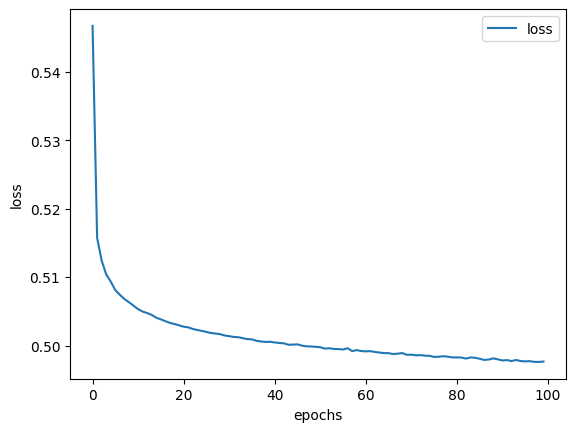

In [ ]:
plt.plot(history.history['loss'], label = 'loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

# 3. NN2 (main nn)

In [ ]:
# Load the saved model
model4 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape = (9,)),
    keras.layers.LayerNormalization(),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.LayerNormalization(),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.LayerNormalization(),
    keras.layers.Dense(9)
])
model4.load_weights("/content/drive/MyDrive/models/music_recommendation/model_output.h5")

Obtain new vector space of spotify dataset

In [ ]:
predictions = model4.predict(x_data)
predictions[:5]
print(predictions.shape)

13965/13965 [==============================] - 33s 2ms/step
(446850, 9)


Original data as input to NN2

In [ ]:
dataset = np.array(df_scaled[columns_to_cluster_scaled], dtype = np.float32)
dataset.shape

(89370, 9)

In [ ]:
df_scaled.describe()

,acousticness_scaled,danceability_scaled,energy_scaled,instrumentalness_scaled,liveness_scaled,valence_scaled,tempo_scaled,speechiness_scaled,loudness_scaled,cluster
count,8.937000e+04,8.937000e+04,8.937000e+04,8.937000e+04,8.937000e+04,8.937000e+04,8.937000e+04,8.937000e+04,8.937000e+04,89370.000000
mean,-5.597204e-17,-5.495436e-16,6.284133e-16,-2.035347e-17,-2.773160e-16,1.412022e-16,2.773160e-16,1.068557e-16,-1.259371e-16,48.588654
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,29.208053
min,-9.709893e-01,-3.181561e+00,-2.471459e+00,-5.357660e-01,-1.113155e+00,-1.785921e+00,-4.052883e+00,-7.712840e-01,-7.851164e+00,0.000000
25%,-9.201697e-01,-6.347459e-01,-6.910101e-01,-5.357660e-01,-6.096018e-01,-8.388778e-01,-7.582899e-01,-4.537729e-01,-3.498495e-01,21.000000
50%,-4.155189e-01,7.836239e-02,1.622029e-01,-5.355863e-01,-4.362809e-01,-4.777348e-02,-1.273685e-03,-3.399981e-01,2.517349e-01,49.000000
75%,8.786089e-01,7.348748e-01,8.517859e-01,-2.338904e-01,3.175113e-01,8.117917e-01,5.985531e-01,-1.454922e-02,6.495700e-01,75.000000
max,1.971822e+00,2.393135e+00,1.424490e+00,2.550896e+00,4.014682e+00,1.998448e+00,4.028553e+00,7.739777e+00,2.494269e+00,99.000000


In [ ]:
dataset[:5]

array([[-0.8758502 ,  0.6443214 , -0.67542624, -0.53576285,  0.72261053,
         0.9335001 , -1.1335022 ,  0.48994064,  0.33612415],
       [ 1.7590885 , -0.8045336 , -1.8247313 , -0.5357488 , -0.5952438 ,
        -0.7704168 , -1.4797755 , -0.09833687, -1.6710389 ],
       [-0.35051706, -0.702661  , -1.072813  , -0.53576595, -0.51319844,
        -1.3295145 , -1.5181949 , -0.28002378, -0.2356561 ],
       [ 1.7029506 , -1.6761104 , -2.2392604 , -0.53554773, -0.43628088,
        -1.2420367 ,  1.9819942 , -0.451127  , -1.9159782 ],
       [ 0.41473204,  0.31606516, -0.7455533 , -0.53576595, -0.6880577 ,
        -1.1507554 , -0.06984429, -0.307365  , -0.22551408]],
      dtype=float32)

Checking for null value

In [ ]:
count_null = np.sum(np.isnan(dataset))
count_null

0

NN2 from scratch

In [ ]:
class Model(keras.Model):
    def __init__(self, input_dim, layer_dim, output_dim):
        super(Model, self).__init__()
        self.input_layer = keras.layers.InputLayer(input_shape = input_dim)
        self.ff1 = keras.layers.Dense(layer_dim, activation='relu', kernel_initializer='glorot_uniform', bias_initializer='zeros')
        self.norm1 = keras.layers.LayerNormalization()
        self.ff2 = keras.layers.Dense(layer_dim, activation='relu', kernel_initializer='glorot_uniform', bias_initializer='zeros')
        self.norm2 = keras.layers.LayerNormalization()
        self.ff3 = keras.layers.Dense(layer_dim, activation='relu', kernel_initializer='glorot_uniform', bias_initializer='zeros')
        self.norm3 = keras.layers.LayerNormalization()
        self.output_layer = keras.layers.Dense(output_dim)
    def call(self, inputs):
        out = self.input_layer(inputs)
        out = self.ff1(out)
        out = self.norm1(out)
        out = self.ff2(out)
        out = self.norm2(out)
        out = self.ff3(out)
        out = self.norm3(out)
        out = self.output_layer(out)
        return out

def generate_random_batches(data, batch_size):
    # Shuffle the data and the corresponding numerical order
    indices = np.random.permutation(len(data))
    shuffled_data = data[indices]
    shuffled_numerical_order = np.arange(len(data))[indices]

    # Reshape the shuffled data into batches
    num_batches = len(data) // batch_size
#     batches = np.reshape(shuffled_data[:num_batches*batch_size], (num_batches, batch_size))
    batches = np.reshape(shuffled_data, (num_batches, batch_size, -1))

    # Reshape the shuffled numerical order into corresponding batches
    numerical_order_batches = np.reshape(shuffled_numerical_order, (num_batches, batch_size))

    return batches, numerical_order_batches


def Loss(count, numerical_order_batch, outputs):
    losses = []
    for output, order in zip(outputs, numerical_order_batch):
      distances = [tf.norm(output - predictions[i], axis=0) for i in range(5*order, 5*order+5) ]
      sum_distances = tf.reduce_sum(distances)
      loss1 = sum_distances
      loss2 = tf.norm(output - df_scaled.loc[order, "cluster"], axis=0)
      loss = 0.3*loss1 + 0.7*loss2
      losses.append(loss)
    return tf.reduce_sum(losses)/len(numerical_order_batch)

model = Model((9,), 64, 9)
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer, loss=Loss)

train_batches, numerical_order_batches = generate_random_batches(dataset, batch_size=270)
num_epochs = 20
# train_batches.shape
for epoch in range(num_epochs):
    count = 0
    epoch_loss = []
    for batch, numerical_order_batch in zip(train_batches, numerical_order_batches):
        with tf.GradientTape() as tape:
            # Forward pass
            outputs = model.call(batch)

            # Calculate the loss
            loss = Loss(count, numerical_order_batch, outputs)
            epoch_loss.append(loss.numpy())
        # Calculate gradients and update weights
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        count += 1
        print(f"Batch [{count}], Loss: {loss.numpy()}")
    # Print or log the loss for monitoring
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {sum(epoch_loss)/len(numerical_order_batch)}")

Batch [1], Loss: 111.1697998046875
Batch [2], Loss: 110.7777099609375
Batch [3], Loss: 108.78173828125
Batch [4], Loss: 110.27989959716797
Batch [5], Loss: 110.8260269165039
Batch [6], Loss: 105.02662658691406
Batch [7], Loss: 101.6454086303711
Batch [8], Loss: 104.9554443359375
Batch [9], Loss: 103.28878784179688
Batch [10], Loss: 109.6589584350586
Batch [11], Loss: 110.21549224853516
Batch [12], Loss: 104.42012786865234
Batch [13], Loss: 102.38667297363281
Batch [14], Loss: 104.43739318847656
Batch [15], Loss: 100.74091339111328
Batch [16], Loss: 104.18846893310547
Batch [17], Loss: 106.13561248779297
Batch [18], Loss: 108.01337432861328
Batch [19], Loss: 100.84967803955078
Batch [20], Loss: 100.55587005615234
Batch [21], Loss: 101.30570220947266
Batch [22], Loss: 99.34478759765625
Batch [23], Loss: 110.47460174560547
Batch [24], Loss: 99.9432601928711
Batch [25], Loss: 106.55027770996094
Batch [26], Loss: 104.81102752685547
Batch [27], Loss: 107.79893493652344
Batch [28], Loss: 112.

KeyboardInterrupt: ignored

In [ ]:
model.save_weights('/content/drive/MyDrive/models/music_recommendation/model_main.h5')

Obtain final vetor space for songs in both datasets

In [ ]:
corr0 = model.predict(dataset)
corr = model.predict(x_data)
corr_full = np.concatenate((corr0, corr), axis=0)
corr_full.shape

13965/13965 [==============================] - 27s 2ms/step


(536220, 9)

Concatenate two dataframes

In [ ]:
df_concat = pd.concat([df_dataset, df_output], axis=0)
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536220 entries, 0 to 446849
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          536220 non-null  object 
 1   artists           535894 non-null  object 
 2   album_name        535909 non-null  object 
 3   track_name        535898 non-null  object 
 4   popularity        536220 non-null  int64  
 5   duration_s        89370 non-null   float64
 6   explicit          536220 non-null  bool   
 7   danceability      535797 non-null  float64
 8   energy            535797 non-null  float64
 9   key               535797 non-null  float64
 10  loudness          535797 non-null  float64
 11  mode              535797 non-null  float64
 12  speechiness       535797 non-null  float64
 13  acousticness      535797 non-null  float64
 14  instrumentalness  535797 non-null  float64
 15  liveness          535797 non-null  float64
 16  valence           53

# 4. Demo

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

def get_recommendations(link: str, limit = 5):
    track_uri = link.split("/")[-1].split("?")[0]
    something_at_the_back = "?" + link.split("/")[-1].split("?")[1]

    cid = '8f7a6b8e24424619addb9254fabb9e8e'
    secret = '0ca6d35a7acc43e5a88e1e6c4d79aa03'
    client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
    sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager, requests_timeout = 10, retries = 10)

    audio_features = sp.audio_features(track_uri)

    audio_input = np.array([audio_features[0]['danceability'],
                            audio_features[0]['energy'],
                            audio_features[0]['loudness'],
                            audio_features[0]['speechiness'],
                            audio_features[0]['acousticness'],
                            audio_features[0]['instrumentalness'],
                            audio_features[0]['liveness'],
                            audio_features[0]['valence'],
                            audio_features[0]['tempo']])
    audio_input = (audio_input - audio_input.mean())/audio_input.std()

    distances = []
    for i in corr_full:
        distance = tf.norm(audio_input - i, axis=0)
        distances.append(distance)
    smallest_index = np.argsort(distances)[:1]
    return df_concat.iloc[smallest_index]



link = "https://open.spotify.com/track/1dGr1c8CrMLDpV6mPbImSI?si=1a6eda4730dd4b25&nd=1"
recommendation_songs = get_recommendations(link, 5)
print(recommendation_songs)